<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/11-Data%20Preprocessing/Using_Predictive_Power_Score_to_Pinpoint_Non_linear_Correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.narrativetext.co/data-hub/using-predictive-power-score-to-pinpoint-non-linear-correlations

In [1]:
!pip install ppscore


  Created wheel for ppscore: filename=ppscore-1.1.1-py2.py3-none-any.whl size=12987 sha256=8215133fdd6e2351f730cc39b45872332f507ebd93d88fb3fd3466c706d8f3a4
  Stored in directory: /root/.cache/pip/wheels/3a/16/cb/4768ae3fd9f02af8cd6d880b9095281cc62bb1748fac67fdc4
Successfully built ppscore


In [2]:
import pandas as pd
import numpy as np
import ppscore as pps

In [3]:
df = pd.DataFrame()

In [4]:
df

""


In [5]:
df["x"] = np.random.uniform(-2, 2, 10000)

In [6]:
df.head()

,x
0,0.269332
1,0.540096
2,0.121716
3,1.194822
4,0.526983


In [7]:
np.random.uniform(-0.5, 0.5, 10000)


array([ 0.0835561 ,  0.0559916 ,  0.13027864, ...,  0.46951982,
        0.20805655, -0.30505536])

In [8]:
df["error"] = np.random.uniform(-0.5, 0.5, 10000)

In [9]:
df.head()

,x,error
0,0.269332,0.456278
1,0.540096,0.034252
2,0.121716,0.395553
3,1.194822,-0.115552
4,0.526983,-0.199322


In [11]:
df["y"] = df["x"] * df["x"] + df["error"]

In [12]:
df.head()

,x,error,y
0,0.269332,0.456278,0.528818
1,0.540096,0.034252,0.325955
2,0.121716,0.395553,0.410368
3,1.194822,-0.115552,1.312049
4,0.526983,-0.199322,0.078389


In [13]:
df["x"].corr(df["y"])

0.003841895949067385

In [14]:
df.corr()

,x,error,y
x,1.000000,0.002022,0.003842
error,0.002022,1.000000,0.232951
y,0.003842,0.232951,1.000000


In [15]:
pps.score(df, "x", "y")

{'baseline_score': 1.0358003943187422,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'model_score': 0.3409901142693411,
 'ppscore': 0.6707955353756992,
 'x': 'x',
 'y': 'y'}

In [16]:
pps.score(df, "y", "x")

{'baseline_score': 1.0003613273551986,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'model_score': 1.1025224536874108,
 'ppscore': 0,
 'x': 'y',
 'y': 'x'}

In [17]:
pps.predictors(df, "y")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,y,0.670796,regression,True,mean absolute error,1.0358,0.340990,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
1,error,y,0.000000,regression,True,mean absolute error,1.0358,1.357497,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


In [18]:
pps.predictors(df, "x")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,error,x,0,regression,True,mean absolute error,1.000361,1.341791,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
1,y,x,0,regression,True,mean absolute error,1.000361,1.102522,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


In [19]:
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,x,error,0.000000,regression,True,mean absolute error,0.252448,0.341009,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
2,x,y,0.670796,regression,True,mean absolute error,1.035800,0.340990,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
3,error,x,0.000000,regression,True,mean absolute error,1.000361,1.341791,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
4,error,error,1.000000,predict_itself,True,None,0.000000,1.000000,None
5,error,y,0.000000,regression,True,mean absolute error,1.035800,1.357497,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
6,y,x,0.000000,regression,True,mean absolute error,1.000361,1.102522,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
7,y,error,0.000000,regression,True,mean absolute error,0.252448,0.282133,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
8,y,y,1.000000,predict_itself,True,None,0.000000,1.000000,None


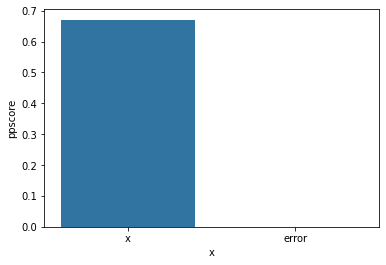

In [20]:
import seaborn as sns
predictors_df = pps.predictors(df, y="y")
sns.barplot(data=predictors_df, x="x", y="ppscore")

In [21]:
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

In [22]:
matrix_df

x,error,x,y
y,,,
error,1.0,0.000000,0.0
x,0.0,1.000000,0.0
y,0.0,0.670796,1.0


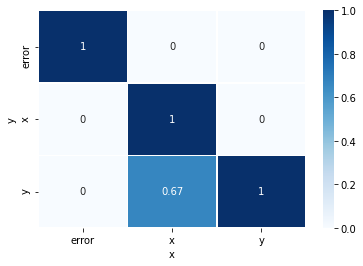

In [23]:
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)